In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense, Activation
from keras.models import Sequential
import tensorflow as tf
import keras
from keras.regularizers import l2
from tensorflow.keras import regularizers

In [2]:
flights_test = pd.read_csv('flights_test.csv')
flights_train = pd.read_csv('flights_train.csv') #extract the zip file first

In [3]:
flights_train = flights_train.drop(columns = ['Unnamed: 0'])
flights_test = flights_test.drop(columns = ['Unnamed: 0'])

# Linear Regression (baseline)

In [80]:
MSE_arr_lr = []
for x in range(1):  #Increase number of loops to test the regressor on different splits
    df1 = flights_train.sample(frac=0.1, replace=True)
    X = df1
    y = df1.ARRIVAL_DELAY
    X = X.drop(columns = ['ARRIVAL_DELAY'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
    
    lr = LinearRegression()
    lr = lr.fit(X_train, y_train)
    MSE_arr_lr.append(mean_squared_error(lr.predict(X_test), y_test))
    
    print(x)

0


In [81]:
print("Average MSE of Linear Regression: ", np.mean(MSE_arr_lr)) #Not linear data

Average MSE of Linear Regression:  761.1296012506377


In [82]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, lr.predict(X_test)))

MAE: 8.291813126086781


In [83]:
# R^2 scores
print('Train:', lr.score(X_train, y_train))
print('Test:', lr.score(X_test, y_test))

Train: 0.6572408414534402
Test: 0.5676732994630418


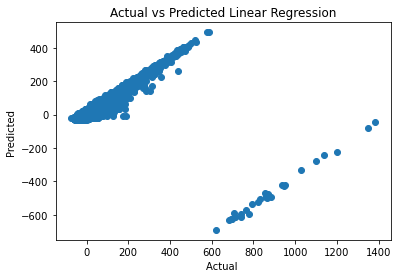

In [87]:
#linear space
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual vs Predicted Linear Regression")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


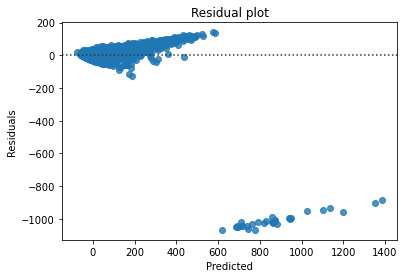

In [85]:
import seaborn

seaborn.residplot(y_test, lr.predict(X_test))
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

# Random Forest Regressor

In [19]:
import pandas as pd
from scipy import stats
df2['z_score_ARRIVAL_DELAY']=stats.zscore(df2['ARRIVAL_DELAY'])

df2=df2.loc[df2['z_score_ARRIVAL_DELAY'].abs()<=3]


In [63]:
MSE_arr_rf = []
for x in range(1):  #Increase number of loops to test the regressor on different splits
    df2 = flights_train.sample(frac=0.1, replace=True)
    X = df2
    y = df2.ARRIVAL_DELAY
    X = X.drop(columns = ['ARRIVAL_DELAY'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
    
    rf = RandomForestRegressor(n_estimators=30, max_depth = 10, min_samples_split = 7, random_state=0, n_jobs = -1)
    rf = rf.fit(X_train, y_train)
    MSE_arr_rf.append(mean_squared_error(rf.predict(X_test), y_test))
    
    print(x)

0


In [21]:
df2

,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY,DELAYED_DEPARTURE,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_VX,AIRLINE_WN,TIME_OF_DAY_Afternoon,TIME_OF_DAY_Evening,TIME_OF_DAY_Morning,TIME_OF_DAY_Night,z_score_ARRIVAL_DELAY
162454,16,1710,140,825,2,-1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,-0.101357
2410171,9,850,164,991,18,36,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0.292663
2261808,11,1330,134,887,0,-6,0,0,0,0,...,0,1,0,0,0,1,0,0,0,-0.150609
906457,26,1445,166,1242,13,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.169532
489724,12,648,90,479,-5,-4,0,0,0,0,...,0,0,0,0,1,0,0,0,1,-0.273740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482485,21,2117,59,174,-4,-4,0,0,0,0,...,0,1,0,0,0,0,1,0,0,-0.249114
1957927,12,2230,95,432,-16,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.544629
2431491,16,1429,114,612,-7,-6,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.322993
1956113,18,2034,112,552,40,44,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.834440


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262207 entries, 2236298 to 120715
Columns: 342 entries, TAXI_OUT to TIME_OF_DAY_Night
dtypes: int64(342)
memory usage: 686.2 MB


In [64]:
print("Average MSE of Random Forest Regressor: ", np.mean(MSE_arr_rf))

Average MSE of Random Forest Regressor:  119.86731519654991


In [65]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, rf.predict(X_test)))

MAE: 7.776798089139462


In [66]:
# R^2 scores
print('Train:', rf.score(X_train, y_train))
print('Test:', rf.score(X_test, y_test))

Train: 0.9341469909152991
Test: 0.9281808240534415


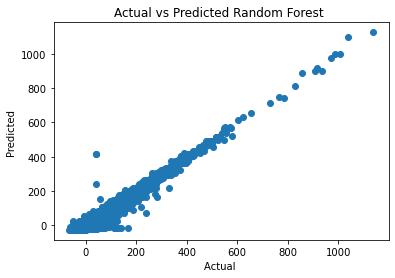

In [67]:
#linear space
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, rf.predict(X_test))
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual vs Predicted Random Forest ")
plt.show()

In [37]:
abs(y_test - y_test.mean()).mean()

22.54946805233223

### Random Forest Prediction

In [38]:
rfp = rf.predict(flights_test)
rfp

array([ 27.48346121,  -7.73571136,   6.50306366, ..., -13.83637588,
        -2.96522736,  -6.21781596])

In [44]:
pd.Series(rfp.reshape((514384))).to_csv('answer_sheet_forest_best.csv')

<AxesSubplot:xlabel='airline'>

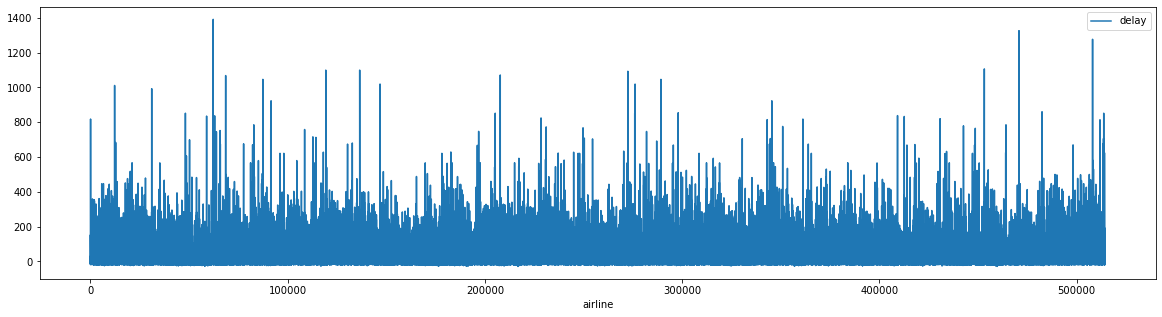

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cols=['airline', 'delay'] 
df = pd.read_csv('answer_sheet_forest_best.csv', names=cols, header=None)

df.plot(figsize=(20,5), kind='line',x=0, y=1) # scatter plot




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


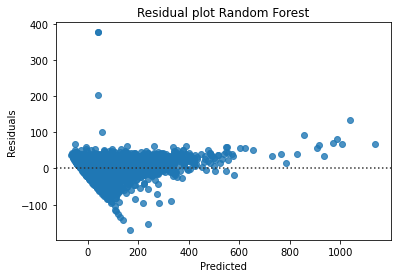

In [68]:
import seaborn

seaborn.residplot(y_test, rf.predict(X_test))
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot Random Forest")
plt.show()

# Neural Network

In [69]:
df3 = flights_train.sample(frac=0.25, replace=True, random_state = 1)


In [58]:
import pandas as pd
from scipy import stats
df3['z_score_ARRIVAL_DELAY']=stats.zscore(df3['ARRIVAL_DELAY'])

df3=df3.loc[df3['z_score_ARRIVAL_DELAY'].abs()<=3]

In [70]:

X = df3
y = df3.ARRIVAL_DELAY
X = X.drop(columns = ['ARRIVAL_DELAY'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [71]:
model = Sequential()

model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros', input_dim = 341))

model.add(Dense(units = 32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros'))

model.add(Dense(units = 32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros'))

model.add(Dense(units = 32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros'))

model.add(Dense(units = 32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros'))

model.add(Dense(units = 32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros'))

model.add(Dense(units = 32, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu', use_bias=True, bias_initializer='zeros'))

model.add(Dense(units = 1))

In [72]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x = X_train, y= y_train, epochs = 500, batch_size=2500) #Use GPU to train faster

Epoch 1/500
210/210 [==============================] - 2s 8ms/step - loss: 460.5128
Epoch 2/500
210/210 [==============================] - 2s 8ms/step - loss: 168.4280A: 0s - los
Epoch 3/500
210/210 [==============================] - 2s 8ms/step - loss: 158.1929
Epoch 4/500
210/210 [==============================] - 2s 8ms/step - loss: 154.8189
Epoch 5/500
210/210 [==============================] - 2s 8ms/step - loss: 151.1300
Epoch 6/500
210/210 [==============================] - 2s 8ms/step - loss: 150.7833
Epoch 7/500
210/210 [==============================] - 2s 8ms/step - loss: 147.5009
Epoch 8/500
210/210 [==============================] - 2s 8ms/step - loss: 147.4072
Epoch 9/500
210/210 [==============================] - 2s 8ms/step - loss: 144.7712
Epoch 10/500
210/210 [==============================] - 2s 8ms/step - loss: 142.4706
Epoch 11/500
210/210 [==============================] - 2s 8ms/step - loss: 141.5562
Epoch 12/500
210/210 [==============================] - 2s 8ms/

210/210 [==============================] - 2s 8ms/step - loss: 122.4213
Epoch 98/500
210/210 [==============================] - 2s 8ms/step - loss: 117.3183
Epoch 99/500
210/210 [==============================] - 2s 8ms/step - loss: 115.7242
Epoch 100/500
210/210 [==============================] - 2s 8ms/step - loss: 120.0052
Epoch 101/500
210/210 [==============================] - 2s 8ms/step - loss: 115.3936
Epoch 102/500
210/210 [==============================] - 2s 9ms/step - loss: 118.9385
Epoch 103/500
210/210 [==============================] - 2s 8ms/step - loss: 124.2206
Epoch 104/500
210/210 [==============================] - 2s 9ms/step - loss: 123.8055
Epoch 105/500
210/210 [==============================] - 2s 9ms/step - loss: 119.8614
Epoch 106/500
210/210 [==============================] - 2s 9ms/step - loss: 118.1082
Epoch 107/500
210/210 [==============================] - 2s 8ms/step - loss: 117.4896
Epoch 108/500
210/210 [==============================] - 2s 8ms/step -

210/210 [==============================] - 2s 9ms/step - loss: 110.7839
Epoch 193/500
210/210 [==============================] - 2s 8ms/step - loss: 119.2635
Epoch 194/500
210/210 [==============================] - 2s 8ms/step - loss: 126.8383
Epoch 195/500
210/210 [==============================] - 2s 8ms/step - loss: 111.0502
Epoch 196/500
210/210 [==============================] - 2s 8ms/step - loss: 113.9117
Epoch 197/500
210/210 [==============================] - 2s 8ms/step - loss: 111.0482
Epoch 198/500
210/210 [==============================] - 2s 8ms/step - loss: 110.7781
Epoch 199/500
210/210 [==============================] - 2s 8ms/step - loss: 110.2217
Epoch 200/500
210/210 [==============================] - 2s 9ms/step - loss: 111.0900
Epoch 201/500
210/210 [==============================] - 2s 8ms/step - loss: 110.6383
Epoch 202/500
210/210 [==============================] - 2s 8ms/step - loss: 110.0251
Epoch 203/500
210/210 [==============================] - 2s 8ms/step

210/210 [==============================] - 2s 8ms/step - loss: 109.4062
Epoch 288/500
210/210 [==============================] - 2s 8ms/step - loss: 109.3438
Epoch 289/500
210/210 [==============================] - 2s 9ms/step - loss: 109.4295
Epoch 290/500
210/210 [==============================] - 2s 8ms/step - loss: 109.2774
Epoch 291/500
210/210 [==============================] - 2s 9ms/step - loss: 109.2172
Epoch 292/500
210/210 [==============================] - 2s 9ms/step - loss: 109.2882
Epoch 293/500
210/210 [==============================] - 2s 9ms/step - loss: 109.5430
Epoch 294/500
210/210 [==============================] - 2s 9ms/step - loss: 108.9528
Epoch 295/500
210/210 [==============================] - 2s 9ms/step - loss: 108.9711
Epoch 296/500
210/210 [==============================] - 2s 9ms/step - loss: 109.6391
Epoch 297/500
210/210 [==============================] - 2s 9ms/step - loss: 109.2119
Epoch 298/500
210/210 [==============================] - 2s 9ms/step

210/210 [==============================] - 2s 10ms/step - loss: 116.2195
Epoch 383/500
210/210 [==============================] - 2s 10ms/step - loss: 122.9845
Epoch 384/500
210/210 [==============================] - 2s 9ms/step - loss: 110.7285
Epoch 385/500
210/210 [==============================] - 2s 9ms/step - loss: 109.5876
Epoch 386/500
210/210 [==============================] - 2s 8ms/step - loss: 109.0798
Epoch 387/500
210/210 [==============================] - 2s 9ms/step - loss: 108.9546
Epoch 388/500
210/210 [==============================] - 2s 9ms/step - loss: 108.7361
Epoch 389/500
210/210 [==============================] - 2s 9ms/step - loss: 108.8370
Epoch 390/500
210/210 [==============================] - 2s 10ms/step - loss: 108.4743
Epoch 391/500
210/210 [==============================] - 2s 8ms/step - loss: 108.3320
Epoch 392/500
210/210 [==============================] - 2s 9ms/step - loss: 108.5044
Epoch 393/500
210/210 [==============================] - 2s 9ms/s

210/210 [==============================] - 2s 9ms/step - loss: 109.8664
Epoch 478/500
210/210 [==============================] - 2s 9ms/step - loss: 108.5992
Epoch 479/500
210/210 [==============================] - 2s 9ms/step - loss: 108.6597
Epoch 480/500
210/210 [==============================] - 2s 9ms/step - loss: 108.7550
Epoch 481/500
210/210 [==============================] - 2s 10ms/step - loss: 108.4737
Epoch 482/500
210/210 [==============================] - 2s 9ms/step - loss: 108.2933
Epoch 483/500
210/210 [==============================] - 2s 10ms/step - loss: 110.6608
Epoch 484/500
210/210 [==============================] - 2s 9ms/step - loss: 109.4663
Epoch 485/500
210/210 [==============================] - 2s 9ms/step - loss: 108.6378
Epoch 486/500
210/210 [==============================] - 2s 9ms/step - loss: 108.4340
Epoch 487/500
210/210 [==============================] - 2s 9ms/step - loss: 108.3870
Epoch 488/500
210/210 [==============================] - 2s 9ms/st

In [74]:
mean_squared_error(model.predict(X_test), y_test)

90.82114253187096

In [89]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, model.predict(X_test)))


MAE: 6.691122510072892


###  Neural Network Predictions

In [103]:
resNNP = model.predict(flights_test)
resNNP

array([[33.444305 ],
       [-4.6860147],
       [ 5.840002 ],
       ...,
       [-4.186424 ],
       [ 6.307732 ],
       [ 3.7000182]], dtype=float32)

In [16]:
pd.Series(resNN.reshape((514384))).to_csv('answer_sheet_NN_best.csv')

In [75]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, model.predict(X_test)))

MAE: 6.658917668983858


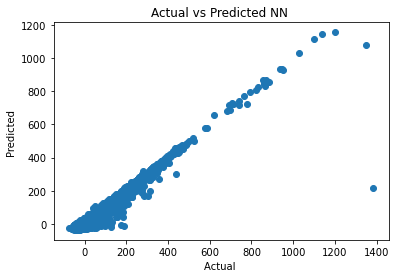

In [92]:
#linear space
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual vs Predicted NN ")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


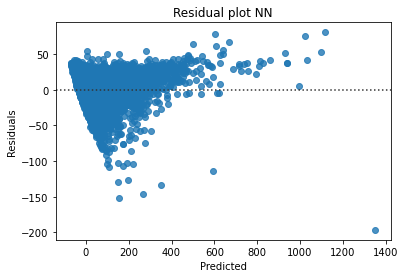

In [78]:
import seaborn

seaborn.residplot(y_test, model.predict(X_test))
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot NN")
plt.show()